In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import gauss
import math

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Question 1.1

In [2]:
def construct(AV, IV, duration, N):
    """ Construct matrix TC """
    
    tc = np.array([])
    iv_count = IV
    
    # onsets arrival vector
    tc = np.zeros(AV)
    
    while len(tc) < N:
        
        # duration of ones
        
        for i in range(duration):
            if len(tc) >= N:
                break
            tc = np.append(tc, 1)

        # increment vector
        while (len(tc) < iv_count) & (len(tc) < N):
            tc = np.append(tc, 0)
        iv_count += IV
        
        # onsets arrival vector
        for i in range(AV):
            if len(tc) >= N:
                break
            tc = np.append(tc, 0)
        
    # Standardise
    tc = tc - np.mean(tc)
    tc = tc / np.std(tc)
    
    return tc

In [3]:
#(AV) = [0,20,0,0,0,0], (IV) = [30,45,60,40,40,40], duration of ones = [15,20,25,15,20,25].
tc1 = construct(0, 30, 15, 240)
tc2 = construct(20, 45, 20, 240)
tc3 = construct(0, 60, 25, 240)
tc4 = construct(0, 40, 15, 240)
tc5 = construct(0, 40, 20, 240)
tc6 = construct(0, 40, 25, 240)
TC = [tc1, tc2, tc3, tc4, tc5, tc6]

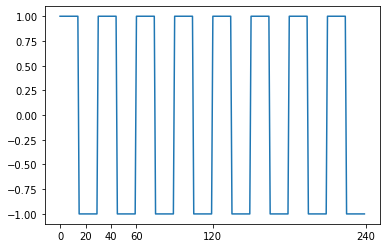

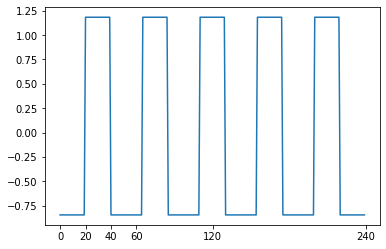

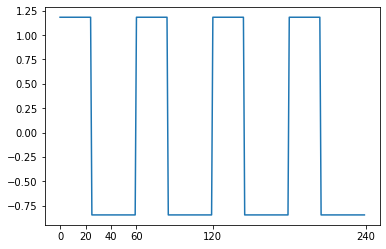

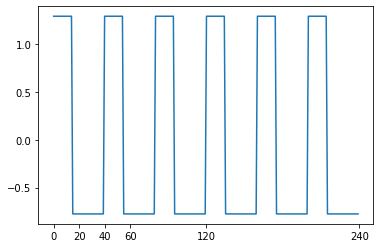

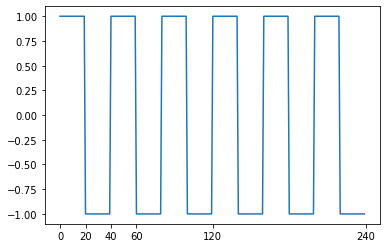

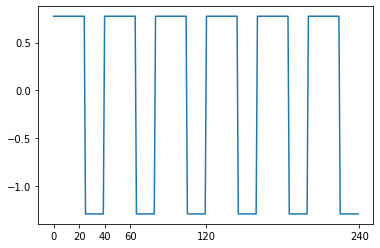

In [4]:
for tc in TC:
    plt.plot(tc)
    plt.xticks([0, 20, 40, 60, 120, 240])
    plt.show()

### Question 1.2

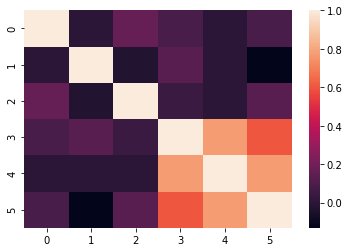

In [5]:
df = pd.DataFrame(TC)
tc_df = df.T
ax = sns.heatmap(tc_df.corr())

### Question 1.3

In [6]:
def one_slice(a, b, c, d):
    
    tmp_sm = np.zeros(441).reshape((21,21))
    
    for row in range(a-1, b):
        for col in range(c-1, d):
            tmp_sm[row][col] = 1.0
            
    return tmp_sm

In [7]:
#i) 02:06,02:06, ii) 02:06,15:19, iii) 08:13,02:06, iv) 08:13,15:19, v) 15:19,02:06, vi) 15:19,15:19
tmp1 = one_slice(2, 6, 2, 6)
tmp2 = one_slice(2, 6, 15, 19)
tmp3 = one_slice(8, 13, 2, 6)
tmp4 = one_slice(8, 13, 15, 19)
tmp5 = one_slice(15, 19, 2, 6)
tmp6 = one_slice(15, 19, 15, 19)

tmpSM = np.array([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6])

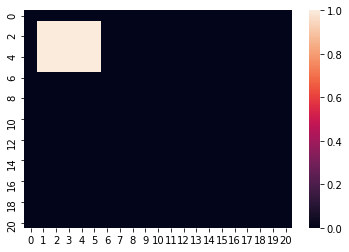

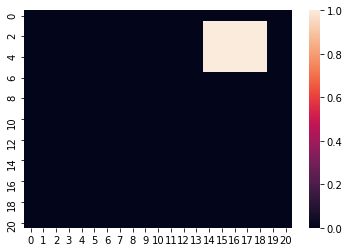

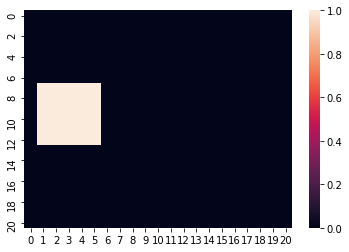

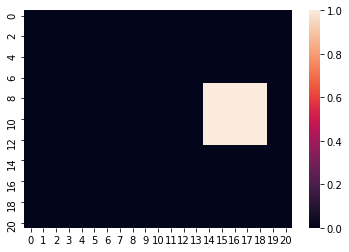

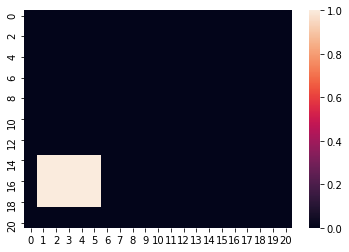

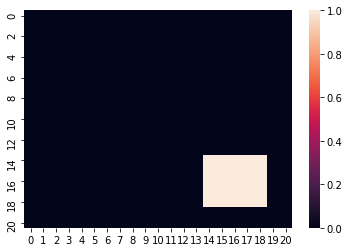

In [8]:
for tmp in tmpSM:
    tmp_df = pd.DataFrame(tmp)
    ax = sns.heatmap(tmp_df)
    plt.show()

In [9]:
SM = tmpSM.reshape((6, 441))

<AxesSubplot:>

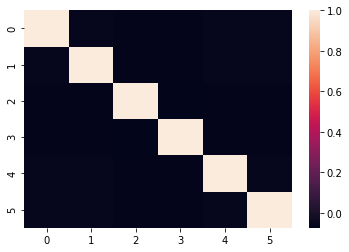

In [10]:
sm_df = pd.DataFrame(SM)
sm_df = sm_df.T
sns.heatmap(sm_df.corr())

### Question 1.4

In [11]:
temp_noise = np.array([gauss(0.0, math.sqrt(0.25)) for i in range(1440)])
temp_noise = temp_noise.reshape((240,6))

spatial_noise = np.array([gauss(0.0, math.sqrt(0.015)) for i in range(2646)])
spatial_noise = spatial_noise.reshape((6,441))

<AxesSubplot:>

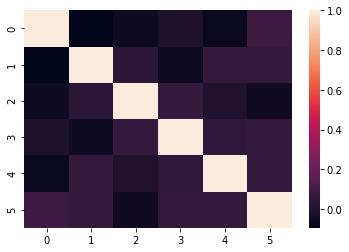

In [12]:
snoise_df = pd.DataFrame(spatial_noise)
snoise_df = snoise_df.T
sns.heatmap(snoise_df.corr())

<AxesSubplot:>

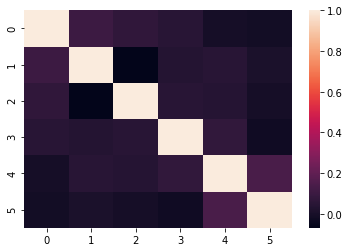

In [13]:
tnoise_df = pd.DataFrame(temp_noise)
sns.heatmap(tnoise_df.corr())

<AxesSubplot:ylabel='Count'>

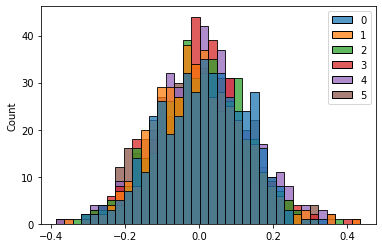

In [14]:
sns.histplot(data=snoise_df)

<AxesSubplot:ylabel='Count'>

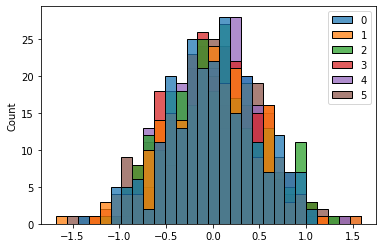

In [15]:
sns.histplot(data=tnoise_df)

In [16]:
TtTs = np.dot(temp_noise, spatial_noise)

<AxesSubplot:>

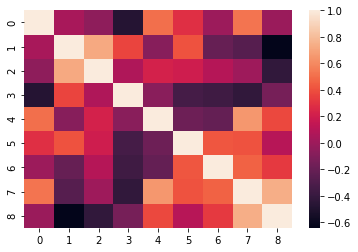

In [17]:
ttts_df = pd.DataFrame(TtTs)
mini_df = ttts_df[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
sns.heatmap(mini_df.corr())

### Question 1.5

<AxesSubplot:>

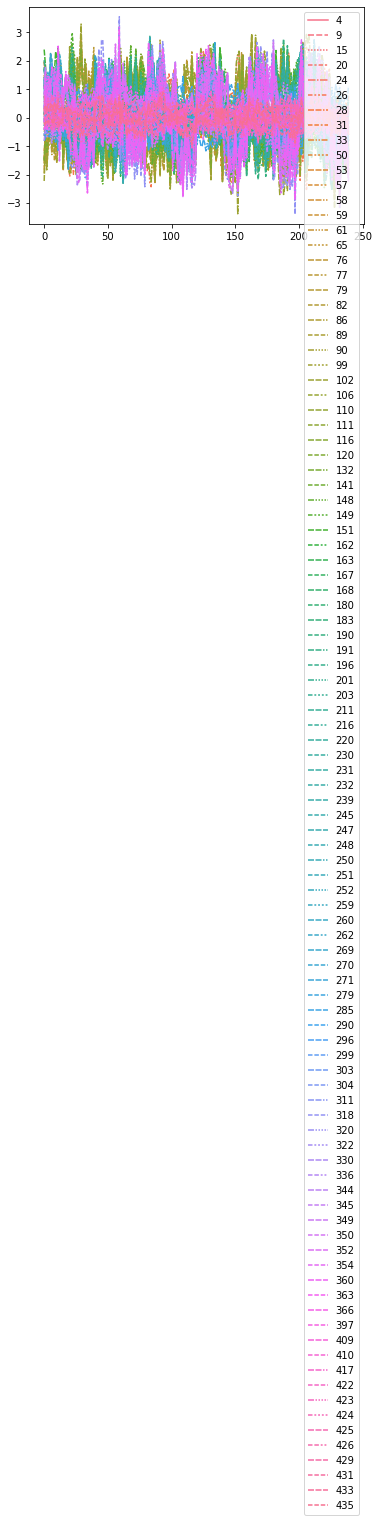

In [19]:
TC = np.transpose(TC)
X = np.dot((TC + temp_noise), (SM + spatial_noise))
X_df = pd.DataFrame(X)
randomly_selected = random.sample(list(range(0,441)), 100)
sample = X_df[randomly_selected]
sns.lineplot(data = sample)

<AxesSubplot:>

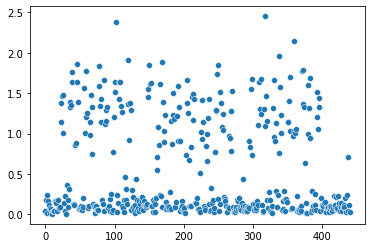

In [20]:
var = np.var(X_df)
sns.scatterplot(data = var)

In [21]:
# Standardise X
X = X - np.mean(X)
X = X / np.std(X)

### Question 2.1

In [22]:
DTD = np.dot(np.transpose(TC), TC)
DTD_inv = np.linalg.inv(DTD)
DTX = np.dot(np.transpose(TC), X)
A_lsr = np.dot(DTD_inv, DTX)
D_lsr = np.dot(X, np.transpose(A_lsr))

In [23]:
Alsr = []
for row in A_lsr:
    Alsr.append(row.reshape((21, 21)))

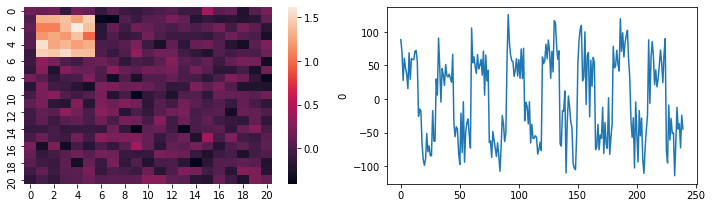

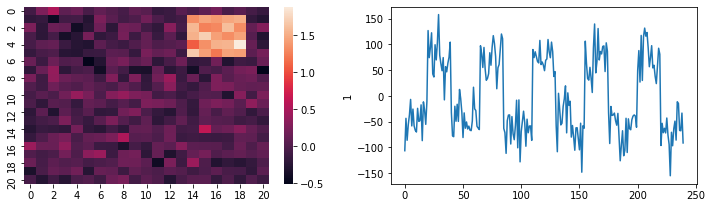

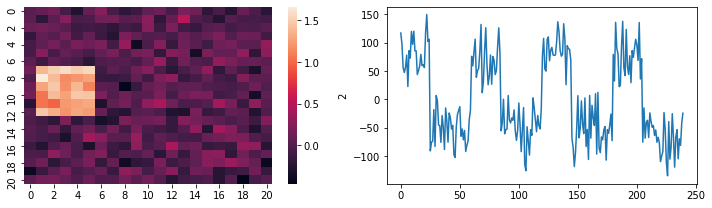

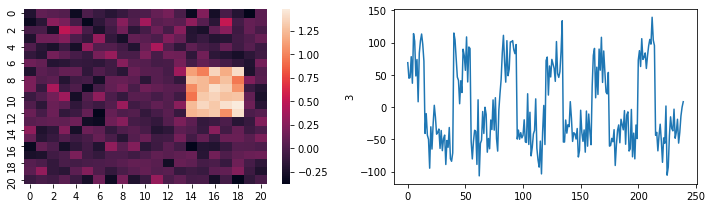

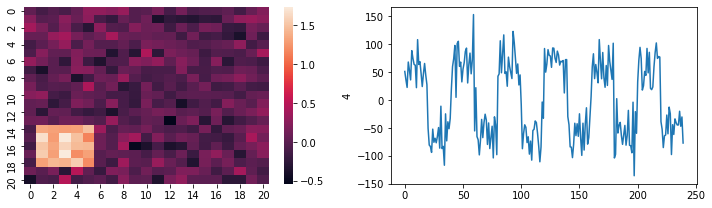

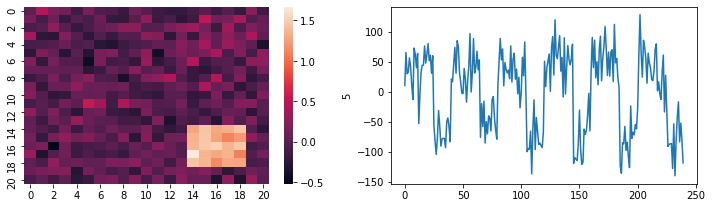

In [24]:
dlsr_df = pd.DataFrame(D_lsr)
for col in range(0, len(Alsr)):
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    sns.heatmap(data = Alsr[col], ax = axes[0])
    sns.lineplot(data=dlsr_df[col], ax = axes[1])
    plt.tight_layout()
    plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


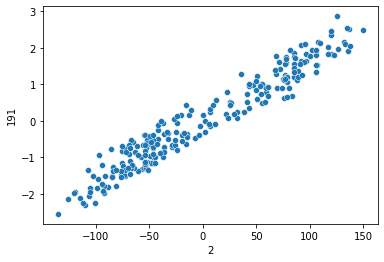

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


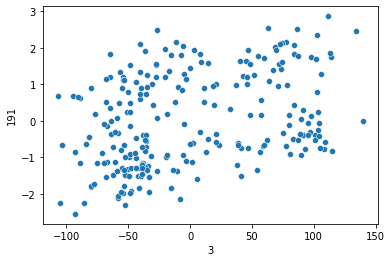

In [25]:
sns.scatterplot(dlsr_df[2], X_df[9*21 + 2])
plt.show()

sns.scatterplot(dlsr_df[3], X_df[9*21 + 2])
plt.show()

### Question 2.2

In [26]:
lamda_hat = 0.5 * 441
I = np.identity(6)
Z = DTD + np.dot(lamda_hat, I)
Z_inv = np.linalg.inv(Z)
A_rr = np.dot(Z_inv, DTX)
D_rr = np.dot(X, np.transpose(A_rr))

In [27]:
from scipy.stats import pearsonr

ctlsr = []
ctrr = []
for i in range(6):
        corr, _ = pearsonr(TC[i], D_lsr[i])
        ctlsr.append(corr)
        
        corr2, _ = pearsonr(TC[i], D_rr[i])
        ctrr.append(corr2)
        
print("Sum of CtRR greater than Sum of CtLSR: ", sum(ctrr) > sum(ctlsr))

Sum of CtRR greater than Sum of CtLSR:  True


In [28]:
lmda_alt = 1000 * 441
Z_alt = DTD + np.dot(lmda_alt, I)
Z_inv_alt = np.linalg.inv(Z_alt)
Arr_alt = np.dot(Z_inv_alt, DTX)

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='0'>

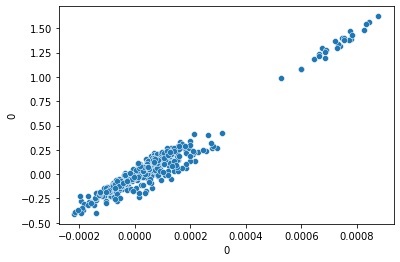

In [29]:
Arr_alt_df = pd.DataFrame(Arr_alt)
Arr_alt_df = Arr_alt_df.T

alsr_df = pd.DataFrame(A_lsr)
alsr_df = alsr_df.T

sns.scatterplot(Arr_alt_df[0], alsr_df[0])

In [30]:
Arr_alt_df[0]

0      8.046478e-05
1      1.036666e-04
2      1.188926e-04
3     -7.095464e-05
4      5.691636e-05
5      7.239540e-05
6     -5.326685e-05
7      1.390919e-05
8     -7.987835e-05
9     -7.651994e-05
10    -2.730406e-05
11     2.596637e-06
12     1.887876e-05
13    -3.792510e-05
14    -5.150599e-05
15     2.142100e-04
16     2.574808e-06
17     4.643986e-05
18    -1.317058e-04
19     1.646692e-05
20     8.502568e-05
21     2.816737e-06
22     6.746811e-04
23     7.382736e-04
24     7.795161e-04
25     6.635582e-04
26     7.753071e-04
27    -1.882906e-04
28    -2.193616e-04
29     1.446425e-05
30    -4.549047e-05
31     7.662346e-05
32     1.513512e-05
33     1.232444e-04
34     9.327215e-05
35    -1.076195e-04
36    -5.382915e-05
37    -1.383284e-04
38    -6.414960e-05
39    -1.127999e-04
40    -9.975627e-05
41     5.630871e-05
42     5.535128e-05
43     5.999086e-04
44     5.998248e-04
45     7.728410e-04
46     8.777751e-04
47     7.460770e-04
48    -1.192978e-04
49     5.307606e-05


<AxesSubplot:ylabel='0'>

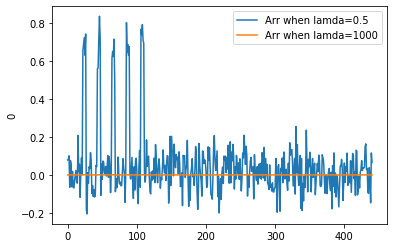

In [31]:
Arr_df = pd.DataFrame(np.transpose(A_rr))
sns.lineplot(data=Arr_df[0], label='Arr when lamda=0.5')
sns.lineplot(data=Arr_alt_df[0], label='Arr when lamda=1000')

In [32]:
Alsr_df = pd.DataFrame(A_lsr)
Alsr_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440
0,0.159765,0.129502,0.174064,-0.128123,0.188253,0.107614,-0.126246,0.057092,-0.087435,-0.128664,-0.058084,-0.010700,0.046926,-0.082706,-0.078871,0.408412,0.053585,0.130321,-0.227652,0.047417,0.201171,0.013946,1.300417,1.319950,1.389111,1.232928,1.471989,-0.364303,-0.409178,0.020527,-0.092606,0.039173,0.070863,0.214209,0.105385,-0.204323,-0.131619,-0.207221,-0.176828,-0.226278,-0.175809,0.108437,0.092240,1.082982,1.083048,1.375240,1.623675,1.397312,-0.183049,0.128387,-0.057268,0.157111,0.115040,0.035835,-0.014194,0.076496,-0.006074,0.076383,0.199462,-0.048845,0.186611,0.082782,-0.183332,0.030838,1.184920,1.274881,1.195609,1.402176,0.987098,-0.168227,0.007368,-0.132612,-0.079634,0.175518,-0.006550,-0.086332,-0.096856,-0.093082,-0.128632,0.002863,0.155610,0.049328,-0.004944,-0.283356,0.049064,1.563898,1.259216,1.340971,1.218879,1.295057,0.003484,-0.025879,0.056251,0.219602,-0.082587,-0.273422,0.096266,-0.165553,0.127353,0.164088,0.034892,-0.206582,-0.293809,0.068281,0.239021,-0.107235,1.477610,1.432570,1.539037,1.382035,1.372920,0.005789,-0.118713,0.012213,0.337578,0.069094,0.192788,0.169128,-0.044722,-0.140696,-0.229617,0.012759,-0.051919,0.017363,-0.012579,0.155041,-0.086066,0.328644,0.186926,0.011627,-0.060720,0.108250,0.156225,0.077185,-0.145643,-0.009900,-0.060596,0.068932,0.273627,0.075085,0.011154,0.099841,-0.075738,0.100362,0.200569,0.180303,-0.314994,-0.139020,0.268404,-0.231700,0.264291,0.135328,0.135992,0.007480,0.305875,0.121921,0.051823,0.184562,0.154027,0.203525,0.003307,0.189767,0.053586,-0.157487,-0.148847,-0.031731,-0.272008,0.184109,0.174845,0.064642,-0.143345,-0.021001,-0.008404,0.241011,-0.007674,-0.308985,0.016196,-0.266064,0.017223,0.035293,0.125968,-0.002962,-0.029930,-0.167508,0.003584,0.256522,0.142331,-0.154019,-0.353044,-0.185201,0.231498,-0.046292,-0.088930,-0.177566,-0.280540,0.240372,0.233849,0.131535,0.167531,0.130286,0.021576,-0.133304,-0.113780,0.240507,0.087654,0.213185,0.015363,-0.226898,-0.224582,-0.244980,-0.030924,0.211580,0.291021,0.033834,-0.058942,0.036879,0.216744,-0.218338,-0.024212,-0.392684,-0.135741,-0.044629,-0.250354,0.012431,0.035270,-0.148271,0.137708,0.108356,0.126743,0.056163,0.181896,0.085569,0.229247,-0.164345,-0.191837,0.251238,-0.198996,0.244127,0.150468,0.265708,0.179627,-0.167114,0.041102,-0.055258,0.173095,0.069301,-0.043549,0.029560,-0.112043,0.109

### Question 2.3

In [34]:
tc_df = pd.DataFrame(TC)
X_df.to_csv("../MAST30034-Assignment1/data/X.csv")
sm_df.to_csv("../MAST30034-Assignment1/data/SM.csv")
tc_df.to_csv("../MAST30034-Assignment1/data/TC.csv")

In [73]:
def new_X(i):
    
    temp_noise = np.array([gauss(0.0, math.sqrt(0.25)) for i in range(1440)])
    temp_noise = temp_noise.reshape((240,6))

    spatial_noise = np.array([gauss(0.0, math.sqrt(0.015)) for i in range(2646)])
    spatial_noise = spatial_noise.reshape((6,441))

    X = np.dot((TC + temp_noise), (SM + spatial_noise))
    X_df = pd.DataFrame(X)
    
    X_df.to_csv("../MAST30034-Assignment1/data/X" + str(i) + ".csv")
    return

for i in range(10):
    new_X(i+1)

# *** RUN Q2.3_R.ipynb before proceeding ***

In [76]:
rho = []
r = 0.0
for i in range(21):
    rho.append(round(r,2))
    r += 0.05

In [75]:
avg_smse = pd.read_csv("../MAST30034-Assignment1/data/smse.csv")